In [2]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
import numpy as np
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
from sklearn.model_selection import train_test_split

In [3]:
#basic preprocessing

def preproc(df_iden,df_transaction):
    df_train = df_transaction.merge(df_iden, on='TransactionID', how='left')

    y_train = df_train['isFraud']
    X_train = df_train.drop('isFraud', axis=1)

    non_floats = []
    for col in X_train:
        if X_train[col].dtypes != "float64":
            non_floats.append(col)
    X_train = X_train.drop(columns=non_floats)

    X_train.fillna(value=0, inplace=True)
    return X_train,y_train


/home/remko/anaconda2/envs/amadeus/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


final score 0.9733333333333334


/home/remko/anaconda2/envs/amadeus/lib/python3.5/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


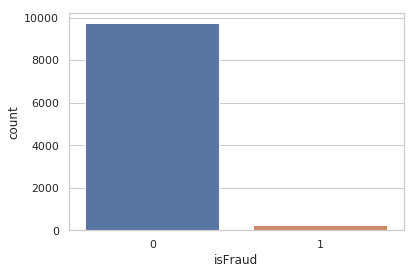

In [4]:
# Read the CSV file
df_iden = pd.read_csv('data/train_identity.csv', nrows=10000)
df_transaction = pd.read_csv('data/train_transaction.csv', nrows=10000)

#here the seaborn, to get an idea of how the distribution fraud/none fraud is.
sns.countplot(df_transaction['isFraud'])
X_train,y_train=preproc(df_iden,df_transaction)


X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.33, random_state=42)



logisticRegr = LogisticRegression(max_iter=100)
logisticRegr.fit(X_train, y_train)




#score on test data
score = logisticRegr.score(X_test, y_test)
print("final score",score)
